# Animating

In [1]:
using Interact, Reactive

It is possible to create interactive animations using Reactive's [timing functions](julialang.org/Reactive.jl/api.html#timing).

Functions like `fps`, `fpswhen`, `every` etc, let us create periodically updating signals. This, combined with the other functions in Reactive provide for declarative ways to define animations. Let us now take the n-gon compose example from interactive diagrams notebook and animate it.

Options{:ToggleButtons,ASCIIString}([Input{ASCIIString}] yellow,"color","yellow","yellow",["yellow"=>"yellow","cyan"=>"cyan","tomato"=>"tomato"])

Slider{Int64}([Input{Int64}] 11,"n",11,3:20)

(1.425302598095622e9,0.0)

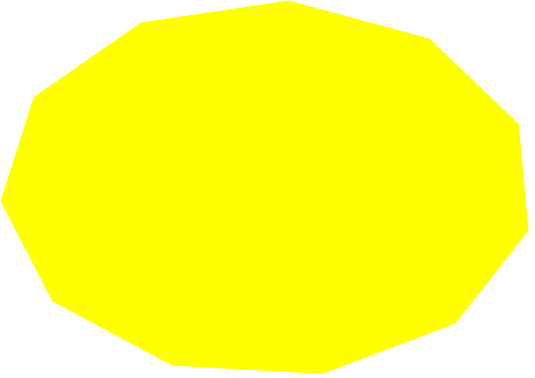

In [2]:
using Color
using Compose

@manipulate for color=["yellow", "cyan", "tomato"], n=3:20, t_dt=timestamp(fps(30.))
    t, dt = t_dt # current time, time since last frame
    compose(context(), fill(color),
    polygon([((1+sin(θ+t))/2, (1+cos(θ+t))/2) for θ in 0:2π/n:2π]))
end

It's often advisable to give your animations a pause checkbox. Here is a bouncing ball that you can pause and resume

Checkbox([Input{Bool}] false,"paused",false)

0.0

0.0

Slider{Float64}([Input{Float64}] 2.5,"gravity",2.5,0.0:0.01:5.0)

Options{:ToggleButtons,ASCIIString}([Input{ASCIIString}] tomato,"color","tomato","tomato",["tomato"=>"tomato","cyan"=>"cyan"])

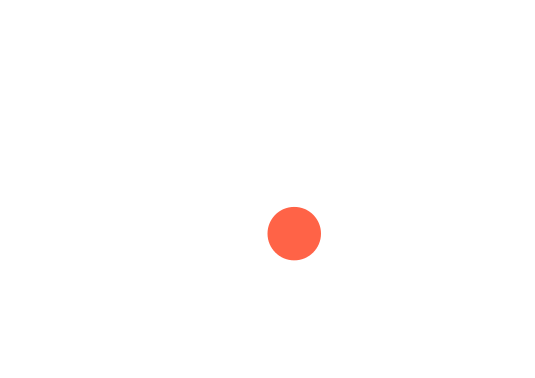

In [3]:
using Compose

@manipulate for 
    paused=false,
    dt = fpswhen(lift(!, paused), 30),       # stop updating time when paused.
    t = foldl(+, 0., dt),                    # add up the time deltas to get time
    gravity = 0:0.01:5,                      # some sort of gravity
    color = ["tomato", "cyan"]               # color the ball

    compose(context(0.5, 1-abs(sin(t*gravity)), 0.1, 0.1), fill(color), circle())
end

Here is a captivating animation made with tiles of varying colors.

Checkbox([Input{Bool}] true,"unpaused",true)

(1.425302608072622e9,0.0)

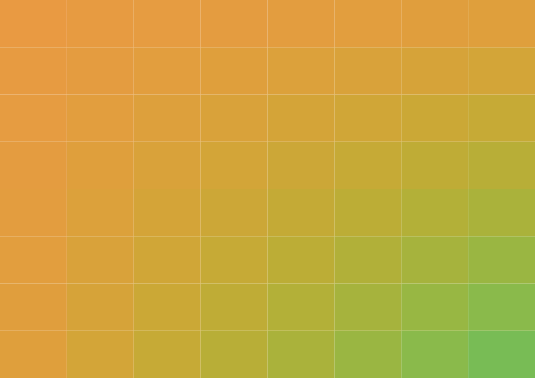

In [4]:
using Color
using Compose

@manipulate for unpaused = true, x=timestamp(fpswhen(unpaused, 30.))
    gridstack([compose(context(), rectangle(), fill(LCHab(70.0, 60.0, 100*x[1]+i*j)))
                   for i in 1:8, j in 1:8])
end

And finally, particles in a box.

(1.425302613333401e9,0.0)

Button{Nothing}([Input{Nothing}] nothing,"Add particle",nothing)

1-element Array{Any,1}:
 [0.61781,0.44481]

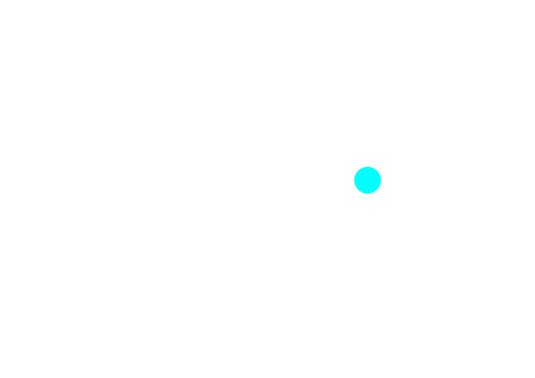

In [5]:
using Compose

box(x) = let i = floor(x)
    i%2==0 ? x-i : 1+i-x
end

colors = ["orange", "cyan", "gray", "tomato"]

dots(points) = [(context(p[1], p[2], .05, .05), fill(colors[i%4+1]), circle())
    for (i, p) in enumerate(points)]

@manipulate for t=timestamp(fps(30.)), add=button("Add particle"),
    velocities = foldl((x,y) -> push!(x, rand(2)), Any[rand(2)], add)

    compose(context(),
            dots([map(v -> box(v*t[1]), (vx, vy)) for (vx, vy) in velocities])...)
end

If you used Interact to come up with something you think people will be wow-ed by, do let us know by commenting on [this issue](https://github.com/JuliaLang/Interact.jl/issues/36). :)